In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv(r'C:\Users\Raul\OneDrive\Escritorio\CS\TC2004B.101\data\Food Waste data and research - by country.csv')

In [30]:
data

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [31]:
# ¿Cuántas features (columnas) tiene este dataset?
print(data.columns,"\n")
print("El dataset tiene", len(data.columns), "features")

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object') 

El dataset tiene 12 features


In [32]:
# ¿Cuántas entradas tiene este dataset?
# data.shape -> (filas, columnas)
print("El dataset tiene", data.shape[0], "entradas")

El dataset tiene 214 entradas


Supongamos que queremos hacer un modelo para predecir el nivel de confianza para la básura generada en cada país. Las columnas o variables más importantes para este modelo serían las que tienen que ver con la cantidad de basura generada en cada país. Por lo tanto, uno puede toamr las variables que tienen que ver con la cantidad de basura generada en cada país son las siguientes:

In [33]:
# ¿Qué columnas serían útiles para un modelo? Puedes asumir un modelo para cualquier objetivo que gustes.

features = [
    'combined figures (kg/capita/year)',
    'Household estimate (kg/capita/year)',
    'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
    'Retail estimate (tonnes/year)',
    'Food service estimate (kg/capita/year)',
    'Food service estimate (tonnes/year)', 'Source'
    ]

target = ['Confidence in estimate']

In [34]:
# ¿Qué tipos de datos hay aquí? ¿Son datos estructurados?
data.info()
print("Los datos son estructurados, ya que están tabulados. La columna 'source' funciona como una Label." )
print("Los datos son de tipo entero y objeto/string")
print("Tenemos datos numericos, categóricos e identificadores.")

# Para los tipos de datos que son objeto, ¿Qué tipo de objeto son (string, list, etc.)?
print("En este contexto los objetos son de tipo string")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [35]:
# ¿Hay datos nulos? Compruebalo con Pandas.
print(data.isnull().sum())

print("No hay datos nulos en el dataset")

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64
No hay datos nulos en el dataset


Genera por lo menos 3 gráficas diferentes de este dataset.

In [36]:
# ¿Hay alguna columna con datos atípicos?
data.select_dtypes(include=['int64','float64']).describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [37]:
# ¿Hay alguna columna con datos atípicos?
data.select_dtypes(exclude=['int64','float64']).describe()

,Country,Confidence in estimate,Region,Source
count,214,214,214,214
unique,214,4,17,214
top,Afghanistan,Very Low Confidence,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
freq,1,130,48,1


c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Household estimate (tonnes/year)', ylabel='Count'>

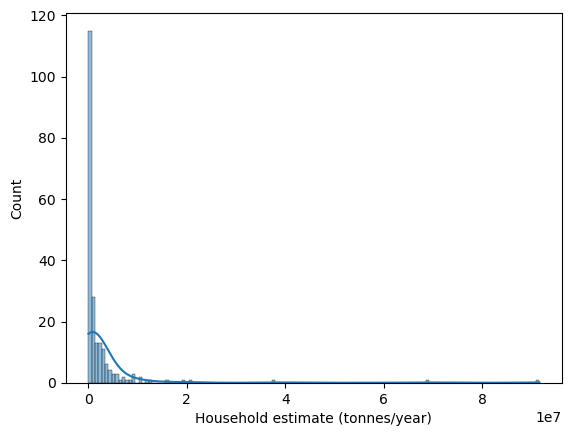

In [38]:
sns.histplot(
    data['Household estimate (tonnes/year)'], 
    kde=True)

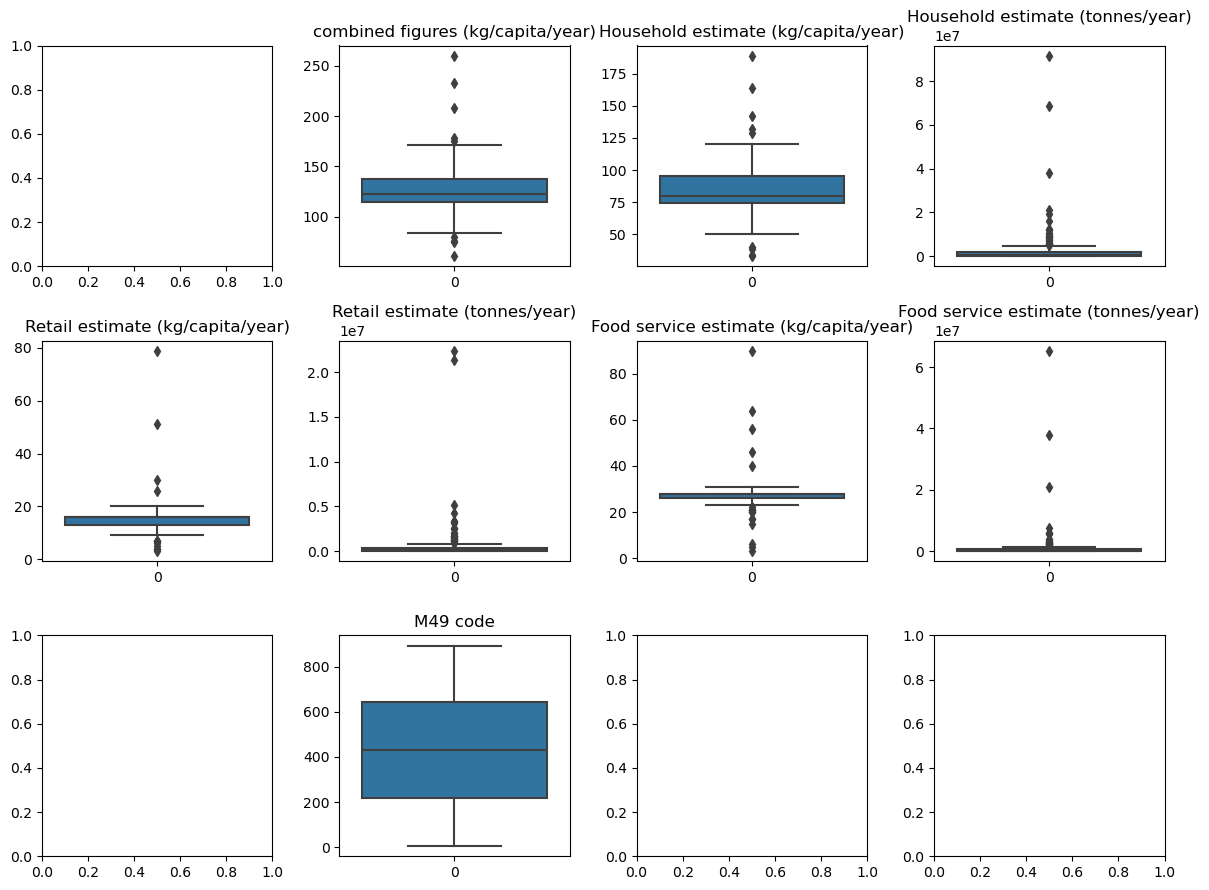

In [39]:
fig, axes = plt.subplots(figsize=(12, 9), nrows=3, ncols=4)  # Create a 3x4 grid of subplots

for i, column in enumerate(data.columns):
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        sns.boxplot(data[column], ax=axes[i // 4, i % 4])  # Use appropriate subplot
        axes[i // 4, i % 4].set_title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


La unica columna sin valores atipicos es "M49 code".

Confidence in estimate
High Confidence         10
Low Confidence          61
Medium Confidence       13
Very Low Confidence    130
dtype: int64

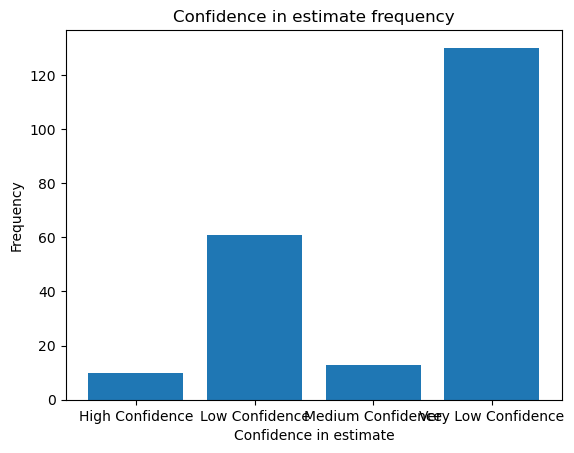

In [40]:
temp = data.groupby('Confidence in estimate').size()
display(temp)
plt.bar(temp.index, temp.values)
plt.xlabel('Confidence in estimate')
plt.ylabel('Frequency')
plt.title('Confidence in estimate frequency')
plt.show()

¿Hay alguna columna con datos categóricos? Si es así, ¿Están balanceados?


Existe la columna "Confidence in estimate", que es una columna categórica (High Confidence, Low Confidence, Medium Confidence, Very Low  Specified). No están balanceados, ya que la mayoría de los datos están en "Very Low Confidence" y "Low Confidence".
